### Setup

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import plotly.express as px
import scipy.stats as stats
from scipy.stats import chi2_contingency
import numpy as np
from utils import cramers_V
from scipy.stats import norm


pd.options.display.max_rows = 4000
data_folder = "./data/"
df_train = pd.read_csv(data_folder + "train.csv")
df_test = pd.read_csv(data_folder + "test.csv")
target = 'SalePrice'

ModuleNotFoundError: No module named 'pandas'

In [110]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_train, title="Profiling Report")

/Users/eric/code/kaggle/.env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.5/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.5/u/import-error

In [80]:
print('df train shape is : ',df_train.shape)
print('df test shape is : ',df_test.shape)
print(df_train.columns)


df train shape is :  (1460, 81)
df test shape is :  (1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars

In [81]:
categorical_var = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
numerical_var = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
ordinal_var = ['OverallQual', 'OverallCond', 'GarageCars']

## I. Output analysis

count    1460.000000
mean      180.921196
std        79.442503
min        34.900000
25%       129.975000
50%       163.000000
75%       214.000000
max       755.000000
Name: SalePrice, dtype: float64


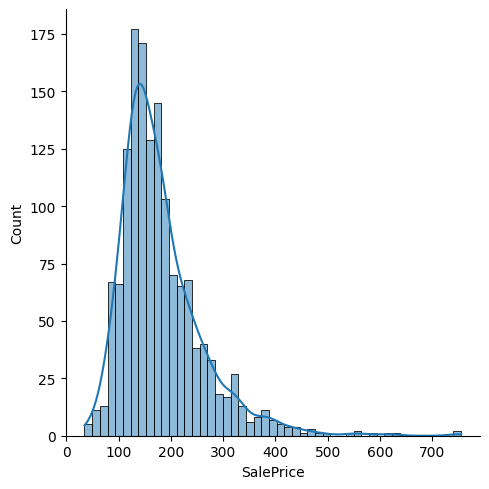

In [82]:
y_train = df_train[target]/1000
print(y_train.describe())
sns.displot(y_train, kde = True)
plt.show()

Mean price is $180k, max $755k, min $35k  
At first glance:  
- No abnormal values  
- Distribution is positively skewed

## II. Manual exploration

A manual exploration have been performed to get the first understanding of the variables:
- Variables can be classified into 3 main segments : location, building characteristics, space
- A manual selection of the variables that seems to be the most important have been made : Neighborhood, OverallQual, OverallCond, TotalBsmtSF, GrLivArea, GarageCars, GarageArea, YrSold  

Let's test out intuition by making first visualisations to see the relationship between SalePrice and those variables

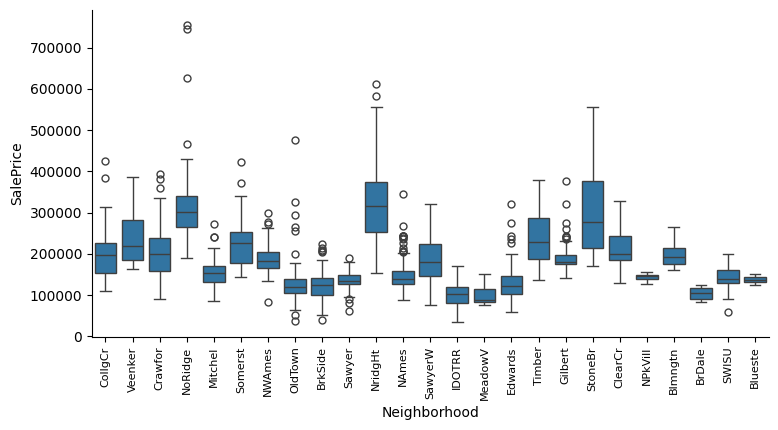

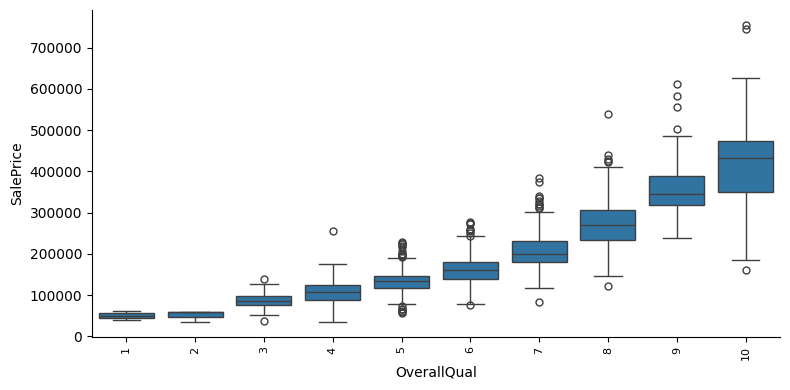

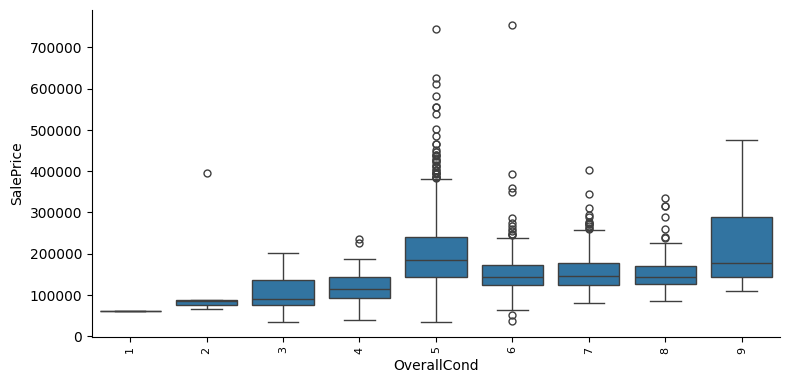

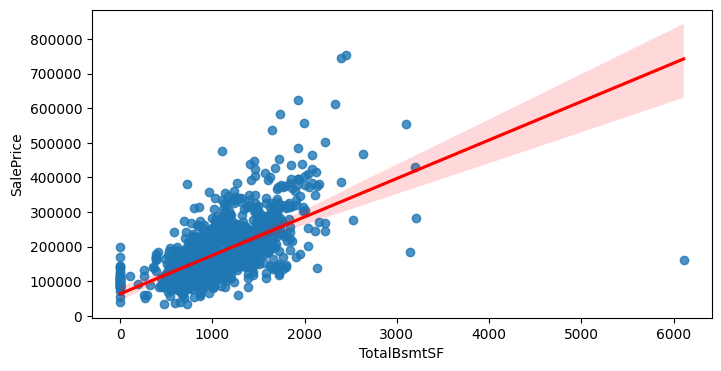

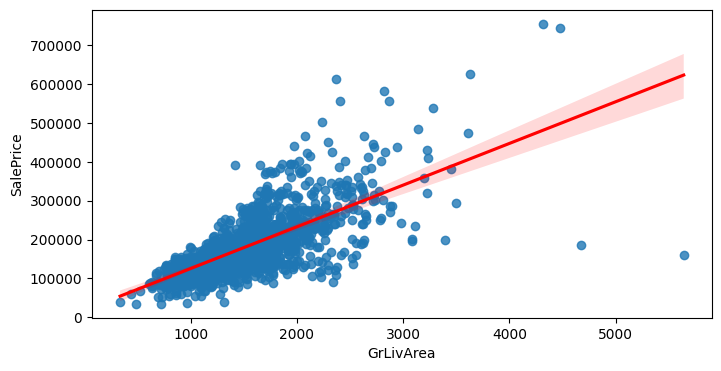

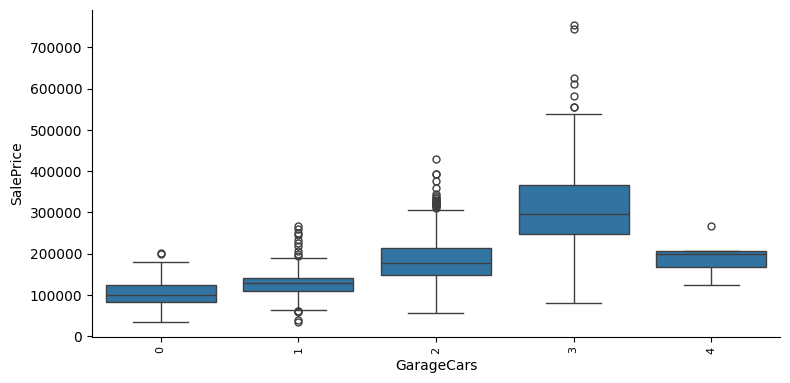

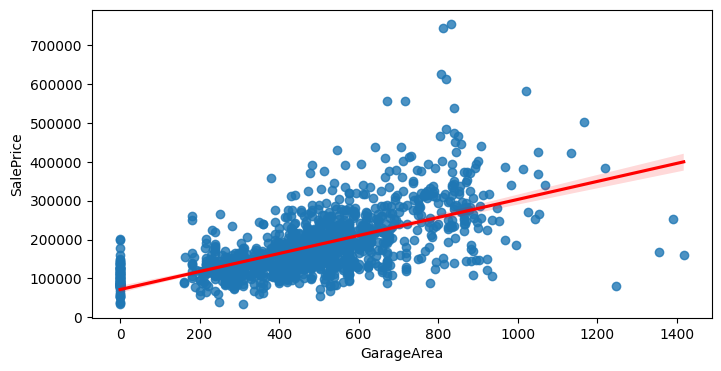

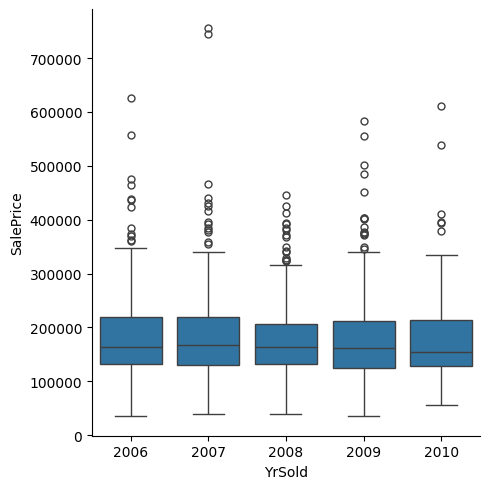

In [83]:
variables = ['Neighborhood',
 'OverallQual',
 'OverallCond',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'YrSold']


for v in variables:
    if v == 'YrSold':
        ax = sns.catplot(data=df_train, x=v, y=target, kind="box")
        plt.show()
    elif v in numerical_var:
        plt.figure(figsize=(8,4))
        sns.regplot(df_train,x= v, y=target, line_kws = {"color": "red"})
        plt.show()
    else:
        ax = sns.catplot(data=df_train, x=v, y=target, kind="box", height=4,aspect=2)
        ax.set_xticklabels(rotation=90, fontsize = 8) 
        plt.show()

Based on the visualization, it seems :
 - Good predictors : Neighborhood, OverallQual, TotalBsmtSF, GrLivArea, GarageCars, GarageArea
 - Bad predictors : OverallCond, YrSold
 
Neighborhood: Seems to have good discrimination between neighborhood  
OverallQual: Positif relationship with SalePrice  
OverallCond: Doesn't seem to have big impact  
TotalBsmtSF: Clear positive relationship. We see a lot of 0 values that must correspond to accomodation with no basement  
GrLivArea: Clear positive relationship  
GarageCars: Positive relationship up to 3 cars. 4 cars correspond to different type of housing ?
GarageArea: clear positive relationship, is the information duplicated with GarageCars ?  
YrSold : price distribution doesn't seem to vary much over the year. Maybe 4 years is too small to see a significant difference ?

In [84]:
plt.figure(figsize=(10,10))
fig = px.scatter_3d(df_train, x='GrLivArea', y='Neighborhood', z=target, color=target, size_max=10)
fig.show()

<Figure size 1000x1000 with 0 Axes>

Conclusion:  
- It seems we can have a descent model by fitting a model using 'GrLivArea' and 'Neighborhood'  
We see that the errors are wider alongside big values of SalePrice & GrLivArea, this is something we could adress by a transformation such as log transformation  
- We can also already detect 4 outliers

## III. Variables analysis

### A. Numerical variables

<Axes: >

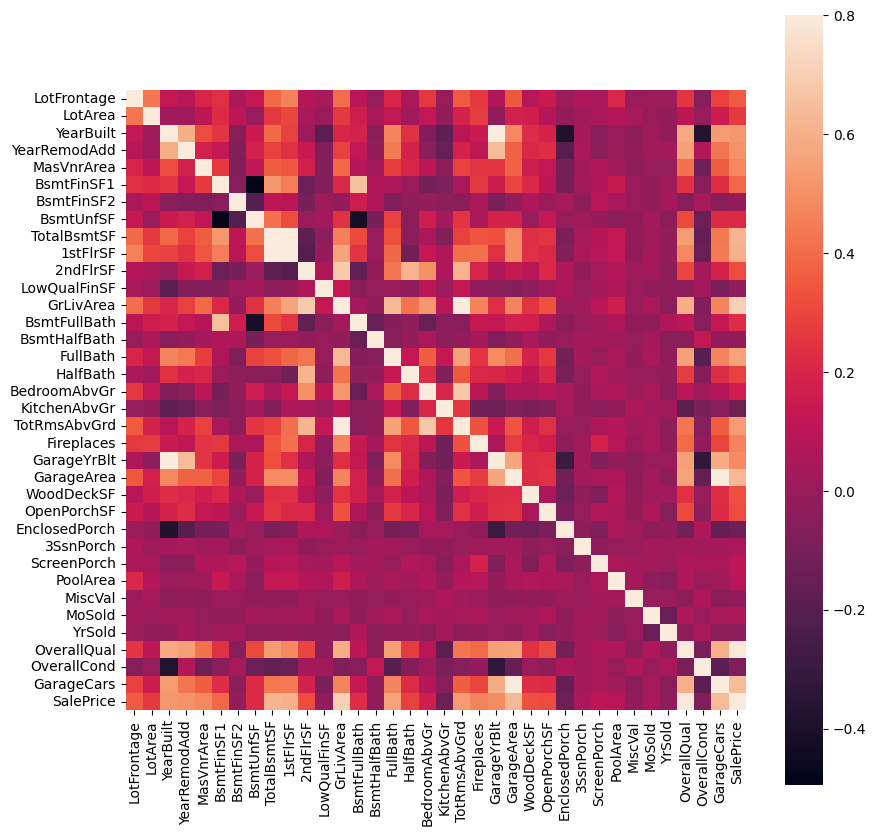

In [85]:
df_num= df_train[numerical_var + ordinal_var +[target]]
corrmat = df_num.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat, square=True, vmax=0.8)

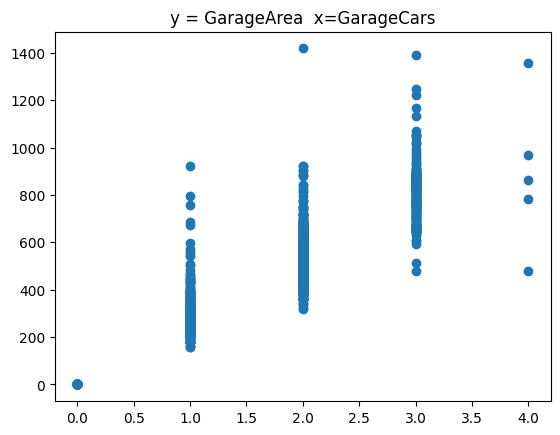

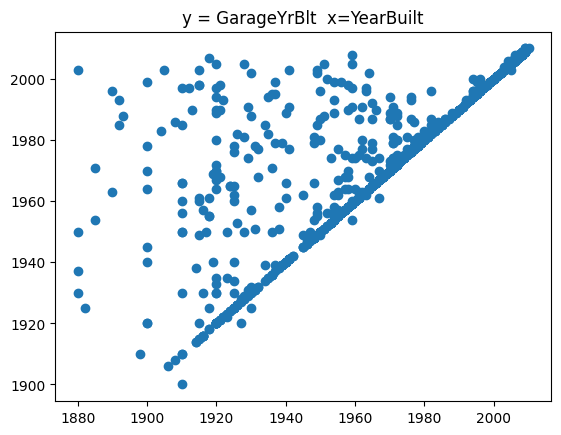

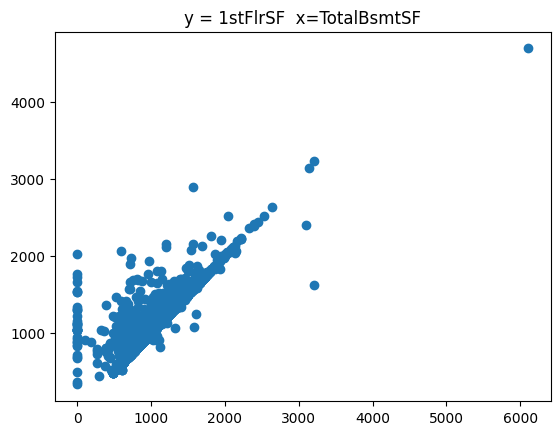

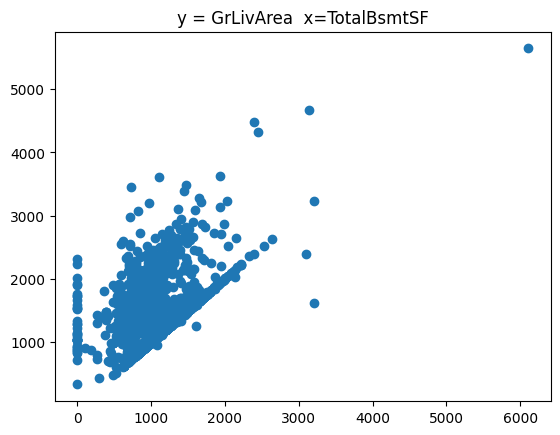

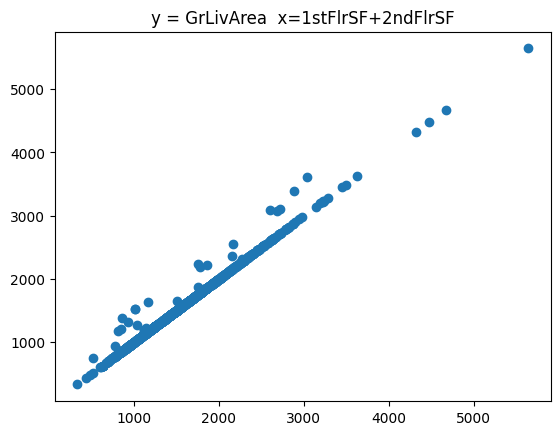

In [86]:
v1,v2 = 'GarageCars', 'GarageArea'
plt.scatter(df_train[v1], df_train[v2])
plt.title(f'y = {v2}  x={v1}')
plt.show()
v1,v2 = 'YearBuilt', 'GarageYrBlt'
plt.scatter(df_train[v1], df_train[v2])
plt.title(f'y = {v2}  x={v1}')
plt.show()
v1,v2 = 'TotalBsmtSF', '1stFlrSF'
plt.scatter(df_train[v1], df_train[v2])
plt.title(f'y = {v2}  x={v1}')
plt.show()
v1,v2 = 'TotalBsmtSF', 'GrLivArea'
plt.scatter(df_train[v1], df_train[v2])
plt.title(f'y = {v2}  x={v1}')
plt.show()

plt.scatter(df_train['1stFlrSF']+df_train['2ndFlrSF'], df_train['GrLivArea'])
plt.title(f'y = GrLivArea  x=1stFlrSF+2ndFlrSF')
plt.show()


Thanks to the correlation matrix and the scatterplots, we detect many linearities:
- GarageCars,GarageArea: are very similar => For a certain area we can put x cars  
- YearBuilt < GaraYrBlt: Garage is built after the housing
- 1stFlrSF > TotalBsmtSF, 1stFlrSF + 2ndFlrSF = GrLivArea, GrLivArea > TotalBsmtSF  
 Those are logical relationship between areas

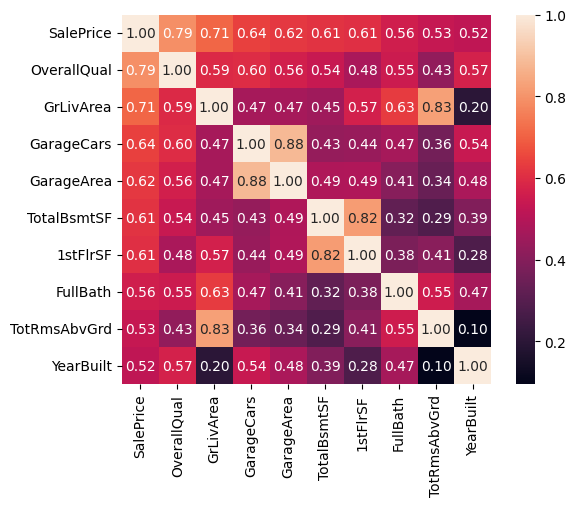

In [87]:
k = 10
cols = corrmat.nlargest(k, target).index
cm = np.corrcoef(df_train[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Regarding what we want to predict, the most interesting variables in term of linear relationships are:
- OverallQual  
- GrLivArea, 1stFlrSF, TotRmAbvGrd &rarr; we'll only keep GrLivArea since we have strong relationship between the variables  
- TotalBsmtSF
- GarageCars / GarageArea &rarr; the 2 variables are very correlated, we can keep only GarageCars  
- FullBath
- YearBuilt



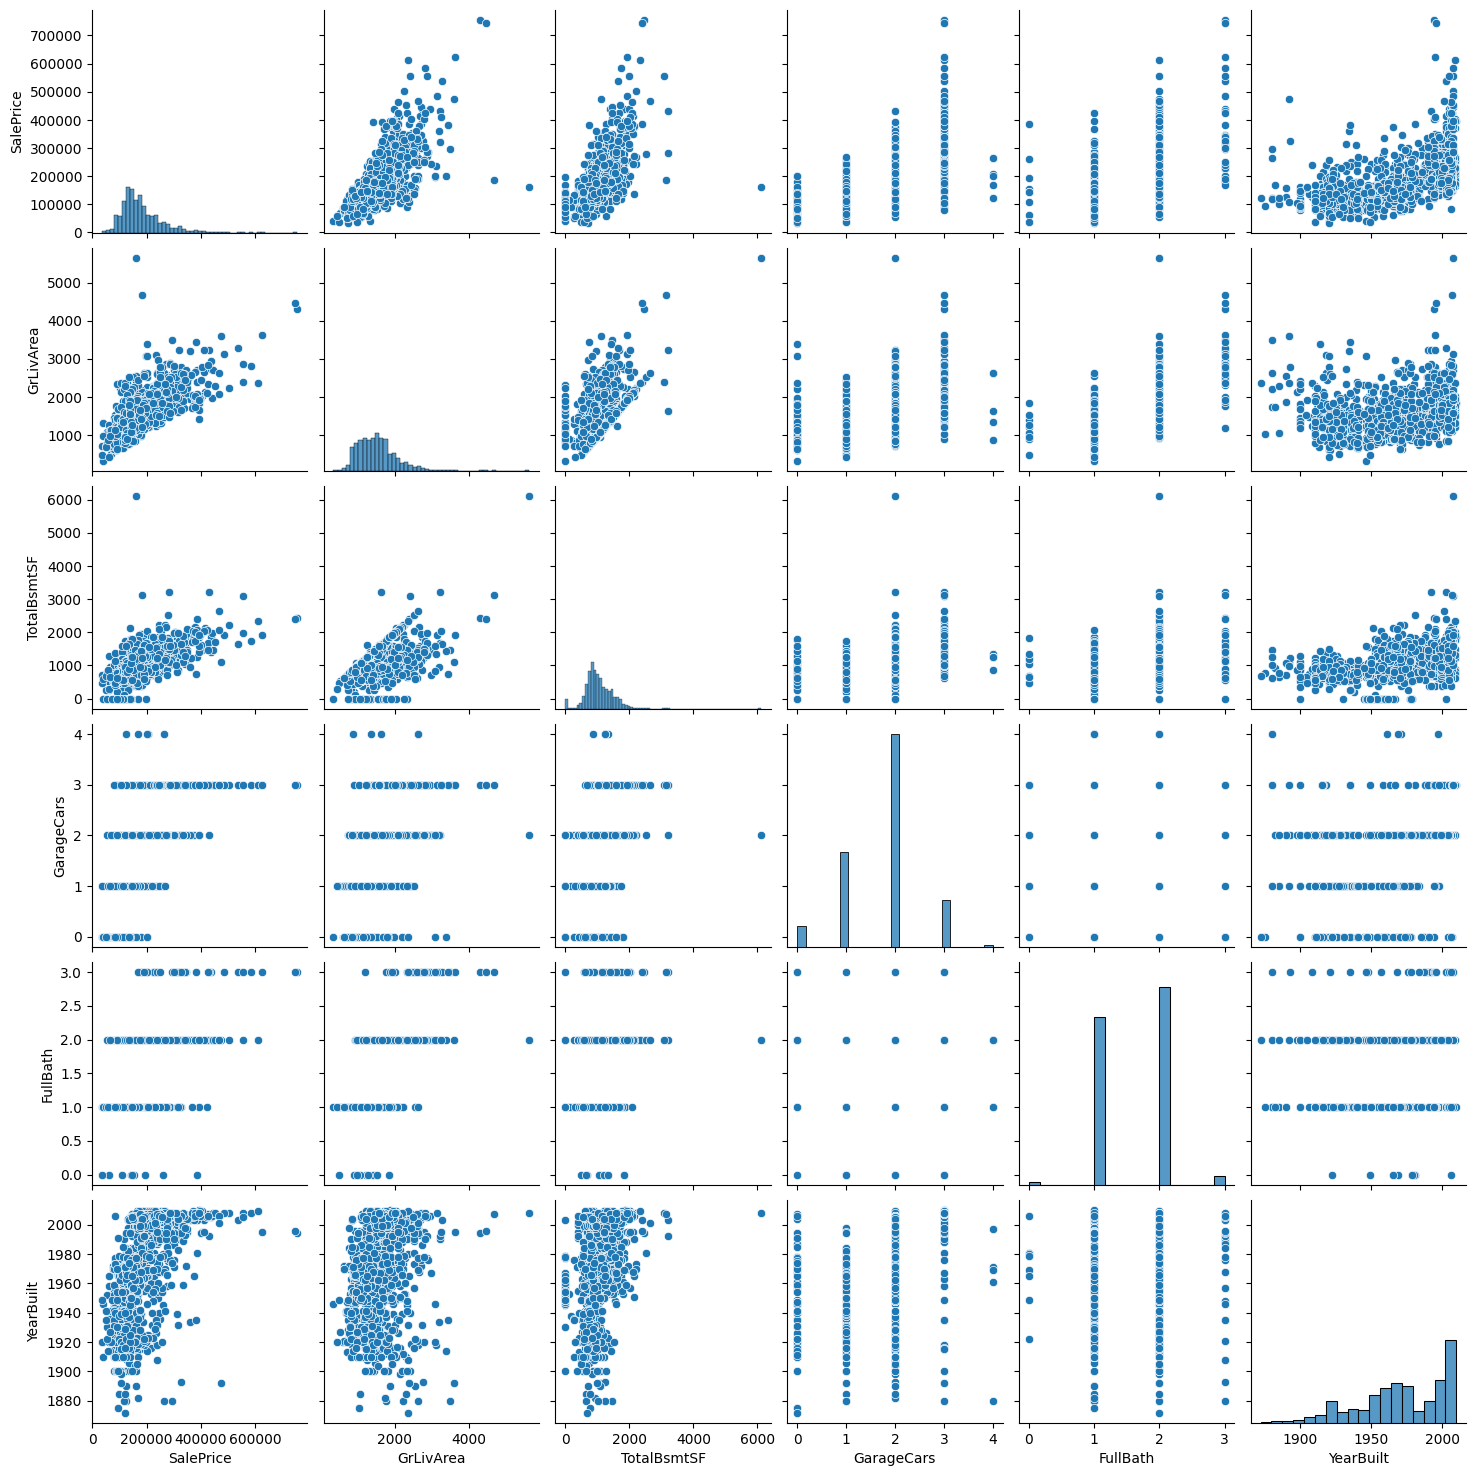

In [88]:
num_v_selected = ['GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt']
cols = [target]+num_v_selected
sns.pairplot(df_train[cols])

All the variables seems to have a positive relationship with SalePrice. However those relations are not linear (exponential ?), this might be adressed by distribution transformation since we can see that a most variables are positively skewed

### B. Categorical variables

Anova
ttest

In [89]:
a = df_train['Alley'].unique()[0]
df_train[df_train['Alley'].isna()]
type(a)

float

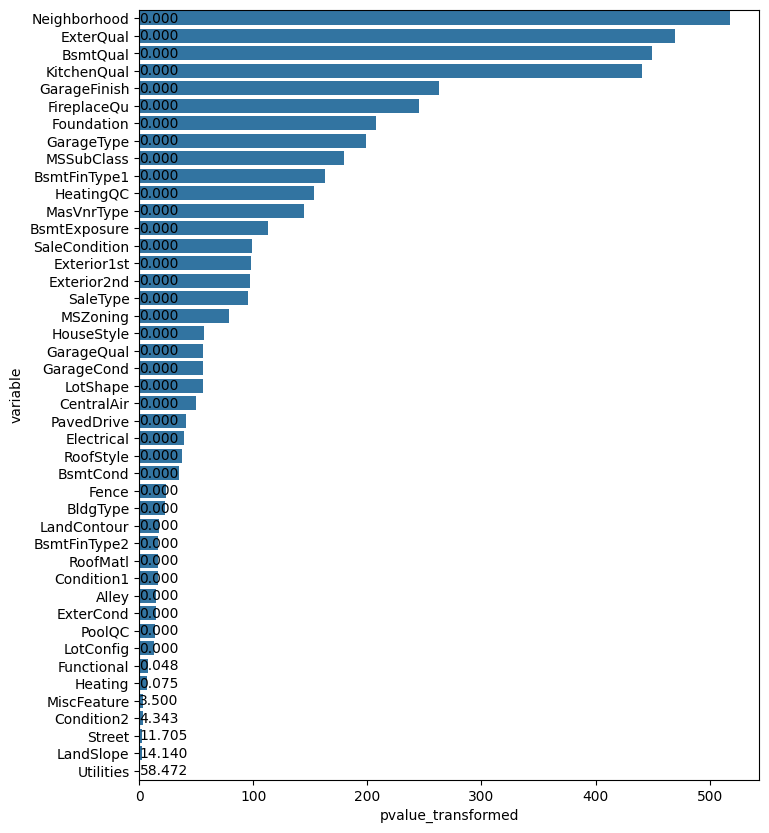

In [90]:
anova_results = []
df_temp = df_train.copy()
for v in categorical_var:
    df_temp[v]=df_temp[v].fillna('no')
    cat = df_temp[v].unique()
    data = [ df_temp[df_temp[v]==c][target] for c in cat]
    fvalue, pvalue = stats.f_oneway(*data)
    anova_results.append((v, fvalue, pvalue))
df_anova = pd.DataFrame(anova_results, columns=['variable', 'fvalue', 'pvalue'])
df_anova['pvalue_transformed']=df_anova['pvalue'].apply(lambda x:np.log(1/x))

df_anova.sort_values('pvalue_transformed', inplace=True,ascending = False)

plt.figure(figsize=(8,10))
ax = sns.barplot(data=df_anova, y='variable', x='pvalue_transformed')
for index, value in enumerate(df_anova['pvalue']):
    ax.text(value, index, f'{value*100:.3f}', ha='left', va='center')
plt.show()



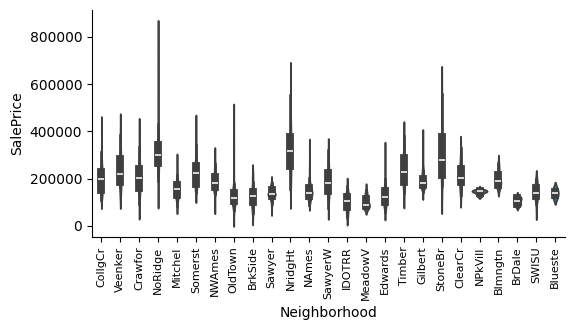

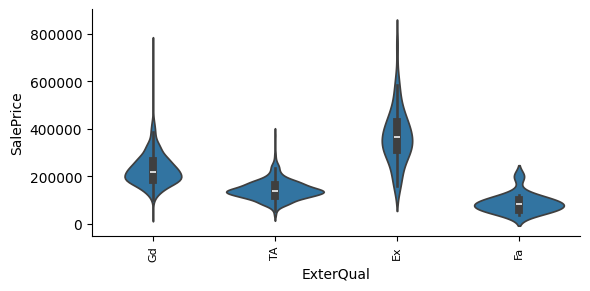

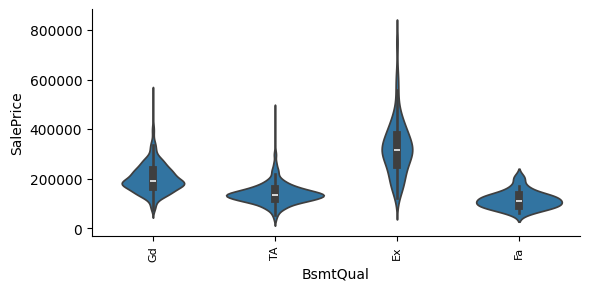

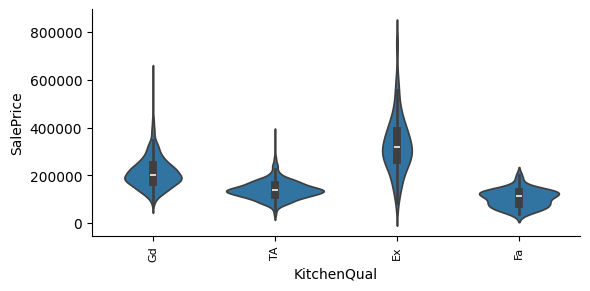

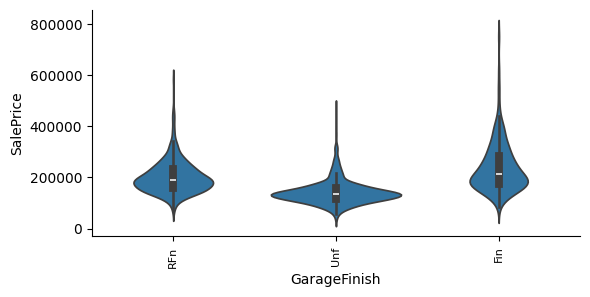

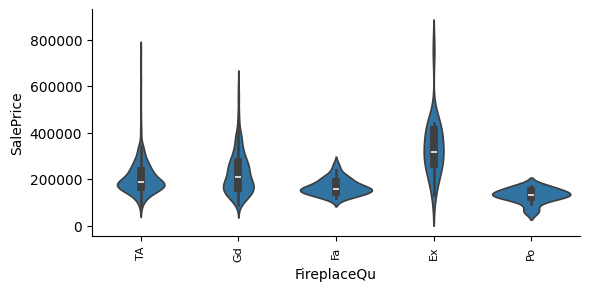

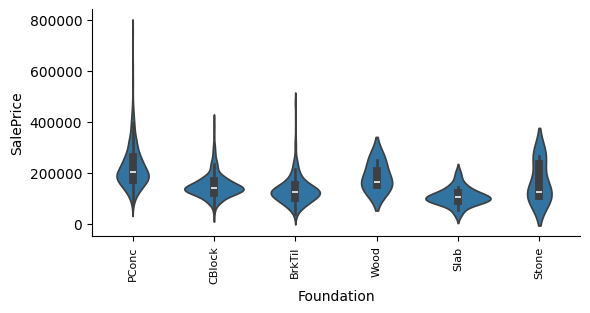

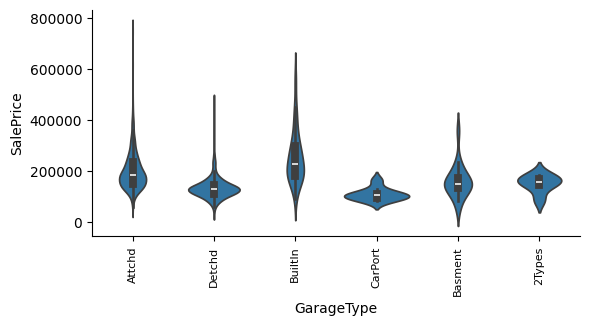

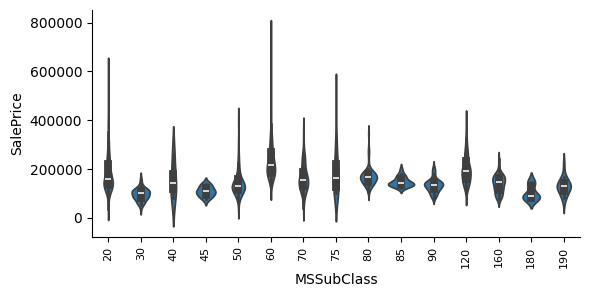

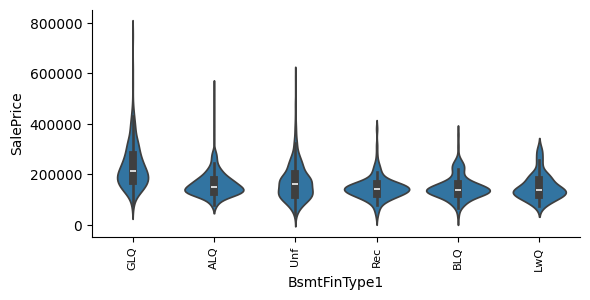

In [91]:
k = 10 # Number of variables selected

v_cat_selected = list(df_anova['variable'].iloc[:10])

for v in v_cat_selected:
    ax = sns.catplot(data=df_train, x=v, y=target, kind="violin", height=3,aspect=2)
    ax.set_xticklabels(rotation=90, fontsize = 8)
    plt.show()
v_cat_selected = list(df_anova['variable'].iloc[:10])

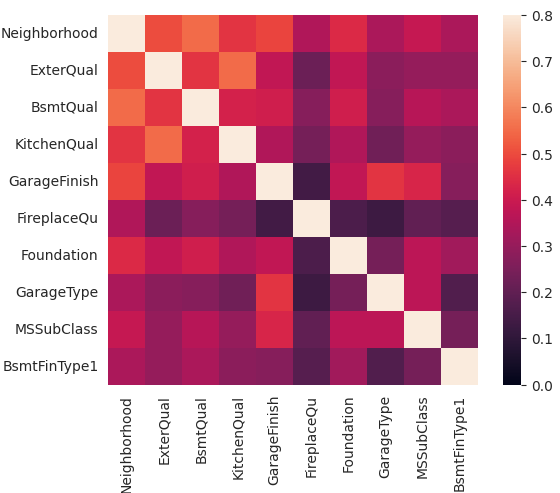

In [92]:
df_temp = df_train[v_cat_selected]


rows= []
for var1 in df_temp:
  col = []
  for var2 in df_temp :
    cramers =cramers_V(df_temp[var1], df_temp[var2]) 
    col.append(round(cramers,2))
  rows.append(col)
  
cramers_results = np.array(rows)
df_cramer = pd.DataFrame(cramers_results, columns = df_temp.columns, index =df_temp.columns)

with sns.axes_style("white"):
  ax = sns.heatmap(df_cramer,vmin=0., vmax=0.8, square=True)

Thanks to Anova test, we find out that many categorical variables have a significant impact on the SalePrice. Arbitrarily we decide to look at the first 10 in order to keep the number of predictors low  
- As per ou intuition, Neighborhood is an important feature  
- ExterQual, BsmtQual, KitchenQual: features about general condition of housing. They are very correlated  
- BsmtQual, BsmtFinType1, Foundation : very correlated  
- GarageType, GarageFinish : very correlated
- FireplaceQu : We wonder if FireplaceQu is present in a significant number of housing  
- MSSubClass


Other than the Cramers'V, as per the visualization, it seems ExterQual, BsmtQual, KitchenQual, GarageFinish have similar information

Finally, we are going to keep : Neighborhood, ExterQual, GarageFinish, FireplaceQu, MSSubClass

In [93]:
cat_v_selected = ['Neighborhood', 'ExterQual', 'GarageFinish', 'FireplaceQu', 'MSSubClass']

## IV. Missing values

In [94]:
v_selected = num_v_selected + cat_v_selected
total = df_train[v_selected].isnull().sum().sort_values(ascending=False)
percent = (df_train[v_selected].isnull().sum()/df_train[v_selected].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
FireplaceQu,690,0.472603
GarageFinish,81,0.055479
GrLivArea,0,0.000000
TotalBsmtSF,0,0.000000
GarageCars,0,0.000000
FullBath,0,0.000000
YearBuilt,0,0.000000
Neighborhood,0,0.000000
ExterQual,0,0.000000
MSSubClass,0,0.000000


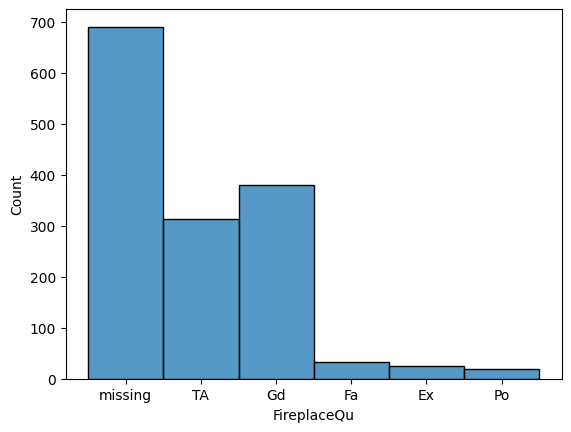

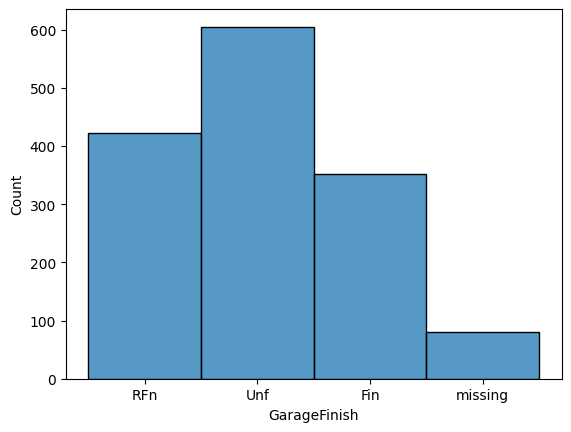

In [95]:
sns.histplot(df_train['FireplaceQu'].fillna('missing'))
plt.show()

sns.histplot(df_train['GarageFinish'].fillna('missing'))
plt.show()

We can assume that the undifined values corresponds to the housing without Fireplace (reps. Garage)

In [96]:
df_train['FireplaceQu'].fillna('Absent', inplace=True)
df_train['GarageFinish'].fillna('Absent', inplace=True)

## V. Outliers

### A. Univariate analysis

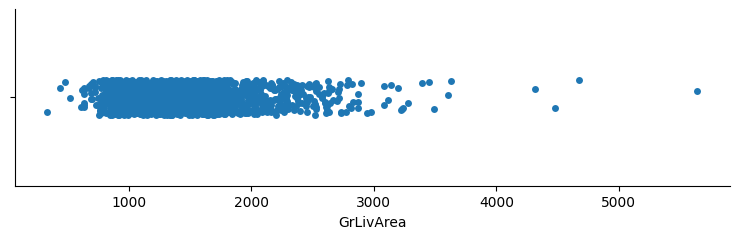

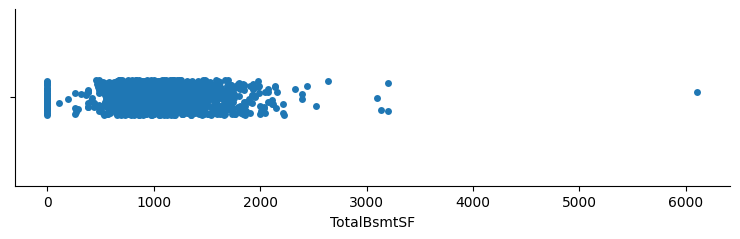

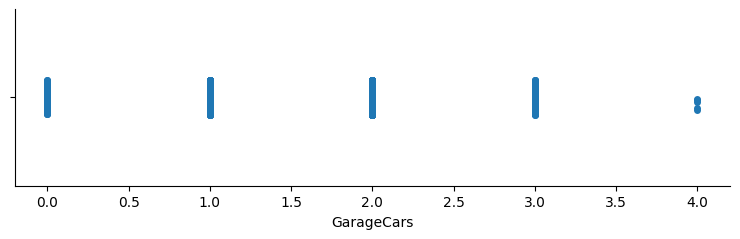

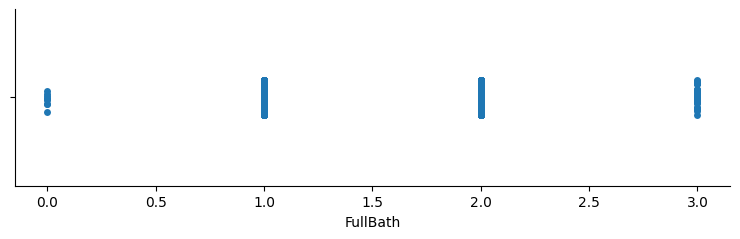

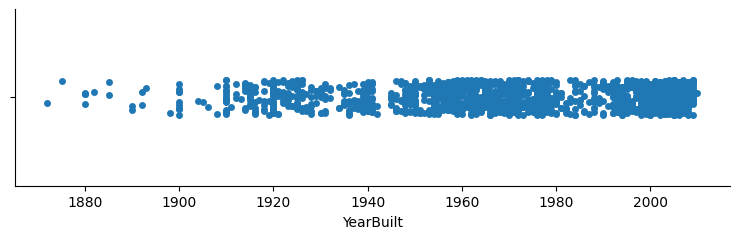

In [97]:
for v in num_v_selected:
    sns.catplot(df_train,x=v, height=2.5, aspect=3)

In [98]:
print(df_train[df_train['GrLivArea']>5000]["Id"])
print(df_train[df_train['TotalBsmtSF']>5000]["Id"])
print(df_train[df_train[target]>700000]["Id"])

1298    1299
Name: Id, dtype: int64
1298    1299
Name: Id, dtype: int64
691      692
1182    1183
Name: Id, dtype: int64


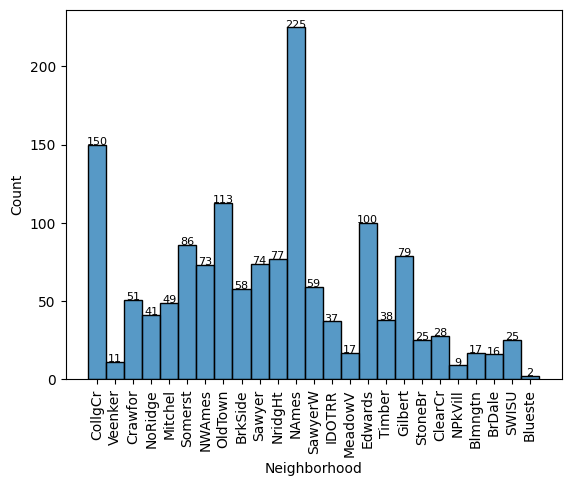

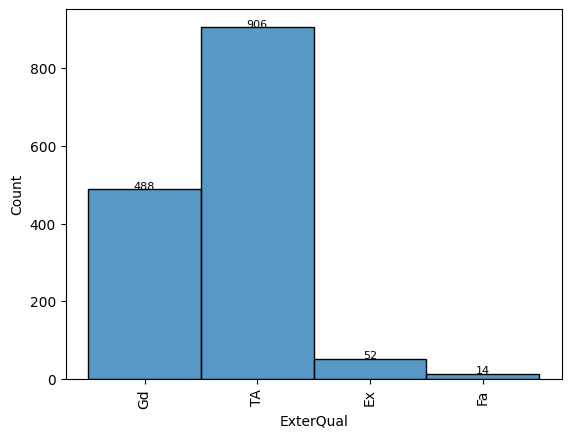

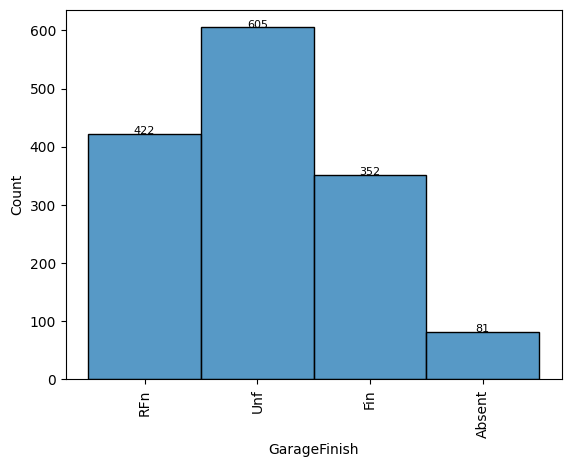

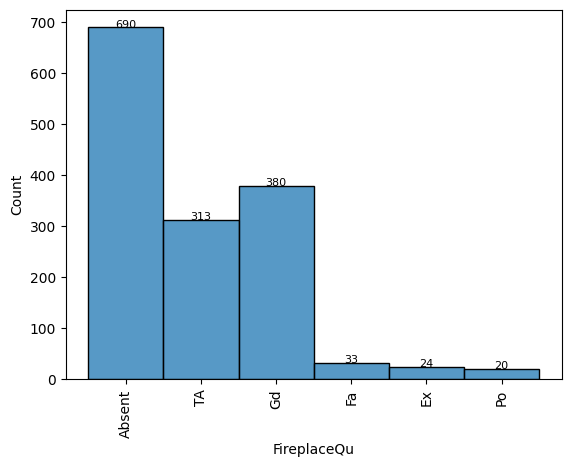

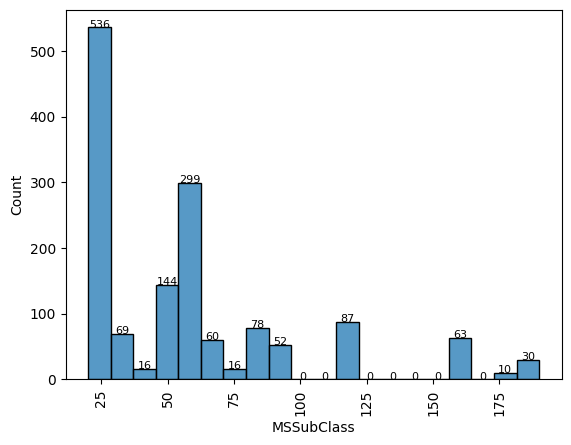

In [99]:
for v in cat_v_selected:
    ax=sns.histplot(df_train[v])
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black')
    plt.xticks(rotation=90)
    plt.show()

Few categories are unbalanced among the categorical variables. But we are going to keep the dataset as it for now

### B. Bivariate analysis

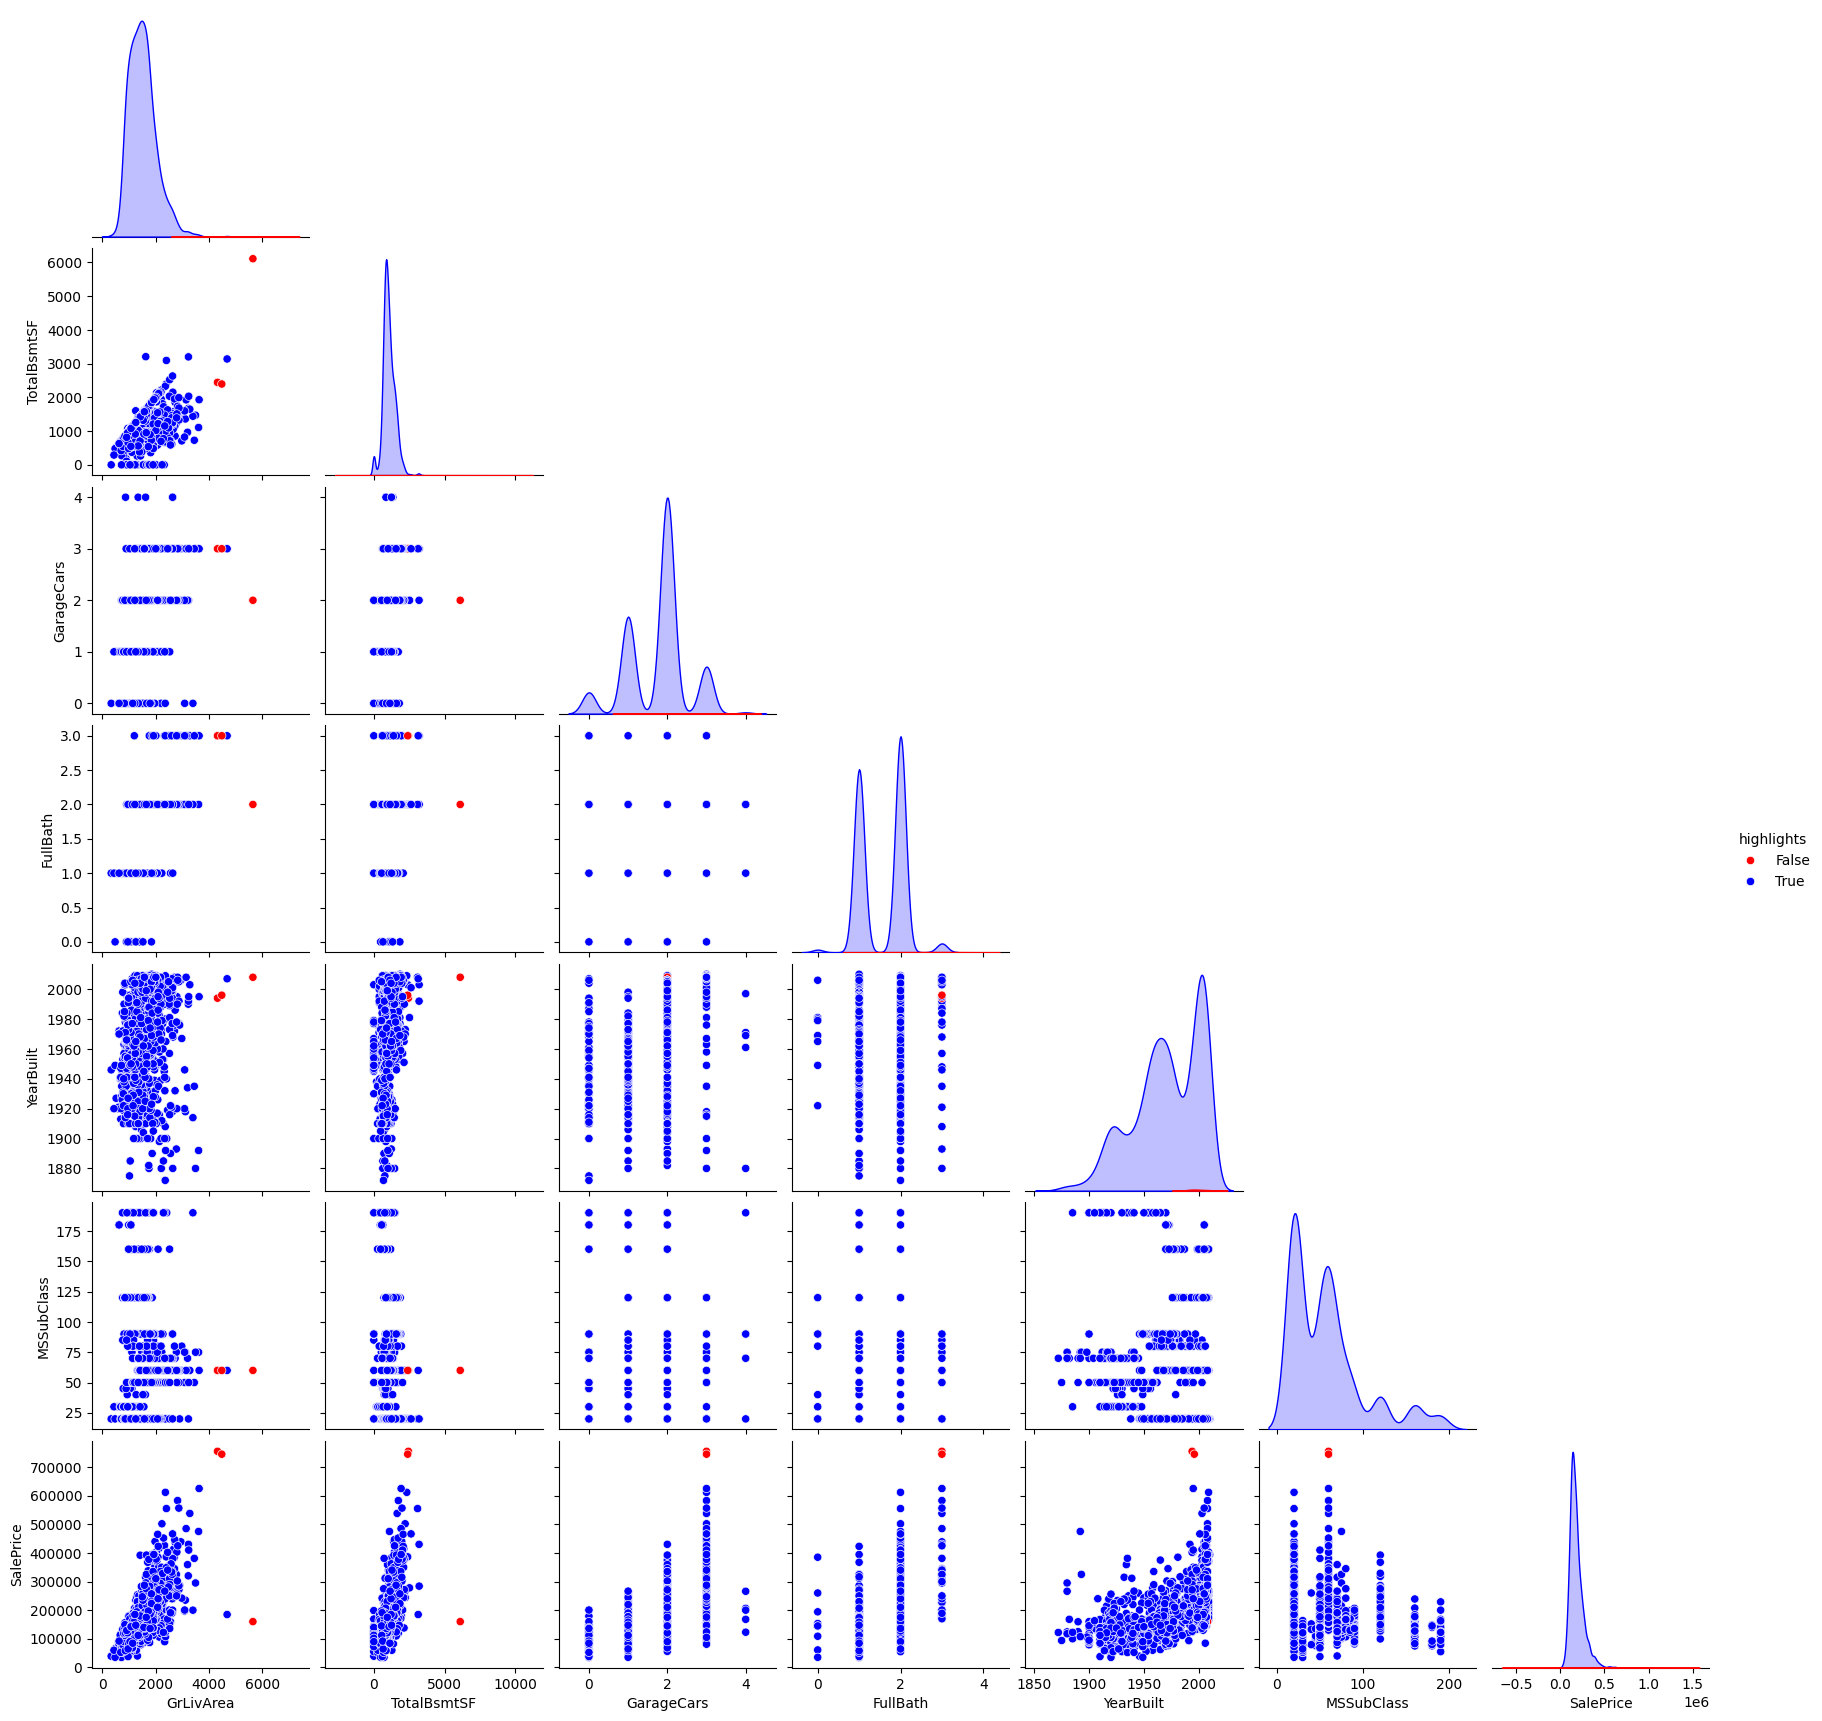

In [100]:
highlights = [1299,692,1183]

df_temp = df_train[v_selected+[target]].copy()
df_temp["highlights"] = ~df_train["Id"].isin(highlights)
colot_palette = {True: 'blue', False: 'red'}

sns.pairplot(df_temp, corner=True, hue = 'highlights', palette=colot_palette)

We remove the 3 observations identified earlier (appearing in red)

## VI. Feature engineering

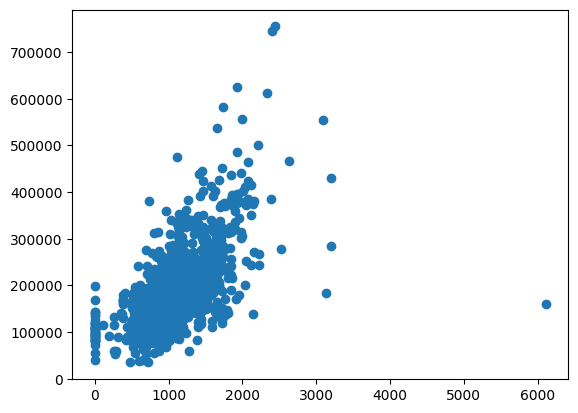

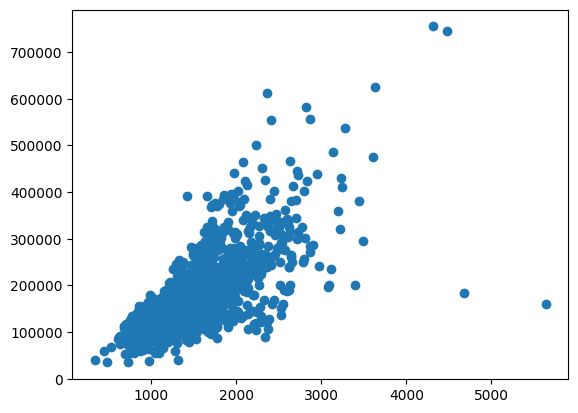

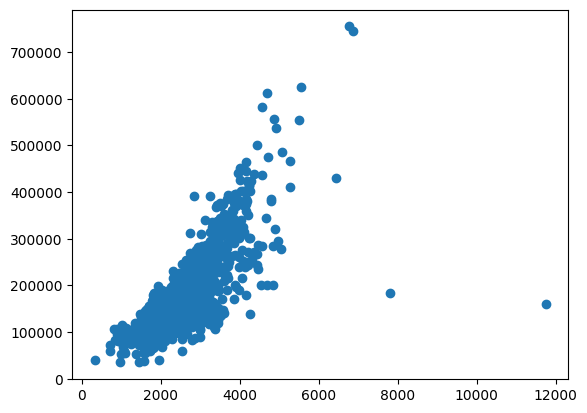

,TotalBsmtSF,GrLivArea,TotArea,SalePrice
TotalBsmtSF,1.000000,0.454868,0.822888,0.613581
GrLivArea,0.454868,1.000000,0.880324,0.708624
TotArea,0.822888,0.880324,1.000000,0.778959
SalePrice,0.613581,0.708624,0.778959,1.000000


In [101]:
df_temp = df_train.copy()
df_temp["TotArea"] = df_temp['GrLivArea']+df_temp['TotalBsmtSF']

plt.scatter(df_temp['TotalBsmtSF'], df_temp[target])
plt.show()
plt.scatter(df_temp['GrLivArea'], df_temp[target])
plt.show()
plt.scatter(df_temp['TotArea'], df_temp[target])
plt.show()

df_temp[['TotalBsmtSF','GrLivArea',"TotArea"]+[target]].corr()

We replace TotalBsmtSF and GrLivArea by their sum which seems more adequate to predict SalePrice

In [102]:
drop_id = [1299,692,1183]
df_train = df_train[~df_train["Id"].isin(drop_id)]
df_train = df_train[v_selected+[target]]
df_train["TotArea"] = df_train['GrLivArea']+df_train['TotalBsmtSF']
df_train.drop(['GrLivArea','TotalBsmtSF'], axis=1, inplace=True)
df_train.head()

,GarageCars,FullBath,YearBuilt,Neighborhood,ExterQual,GarageFinish,FireplaceQu,MSSubClass,SalePrice,TotArea
0,2,2,2003,CollgCr,Gd,RFn,Absent,60,208500,2566
1,2,2,1976,Veenker,TA,RFn,TA,20,181500,2524
2,2,2,2001,CollgCr,Gd,RFn,TA,60,223500,2706
3,3,1,1915,Crawfor,TA,Unf,Gd,70,140000,2473
4,3,2,2000,NoRidge,Gd,RFn,TA,60,250000,3343


## VII. Distribution analysis

/var/folders/cv/8lbpg55x7gq0m33fw39zw0t40000gn/T/ipykernel_5868/3519014360.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




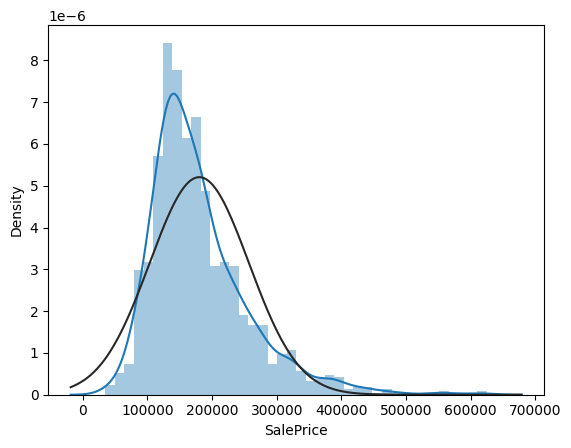

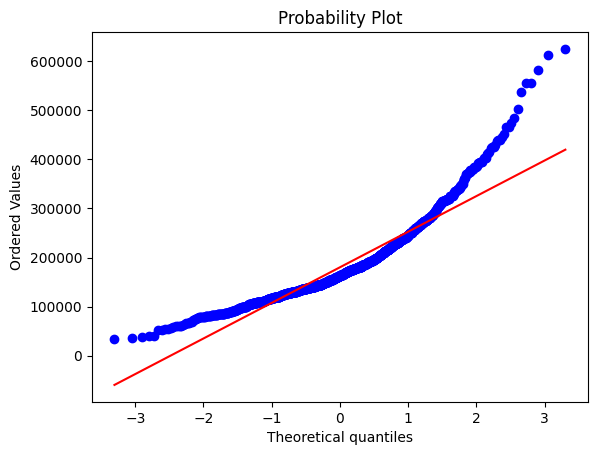

/var/folders/cv/8lbpg55x7gq0m33fw39zw0t40000gn/T/ipykernel_5868/3519014360.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




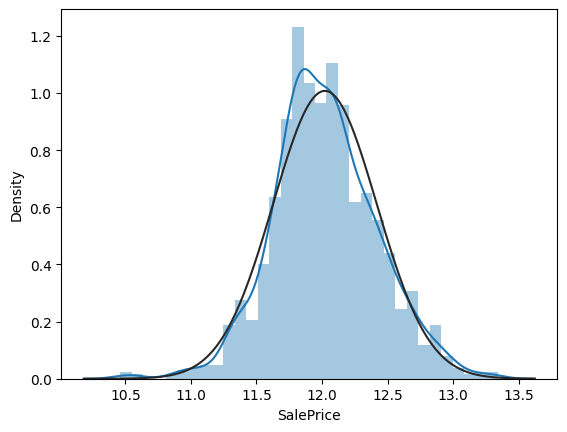

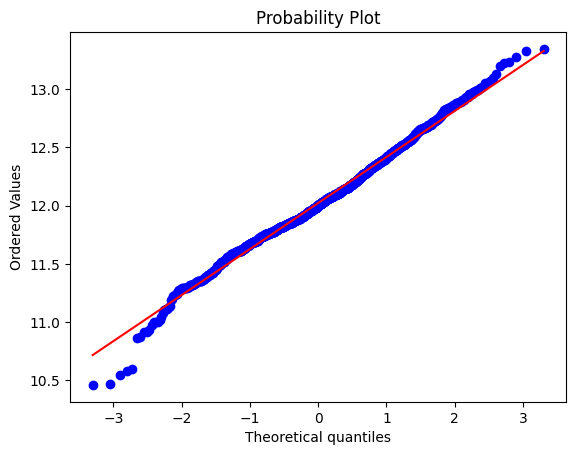

In [61]:
sns.distplot(df_train['SalePrice'], fit=norm)
plt.show()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

y_new = np.log(df_train['SalePrice'])
sns.distplot(y_new, fit=norm)
plt.show()
res = stats.probplot(y_new, plot=plt)
plt.show()

/var/folders/cv/8lbpg55x7gq0m33fw39zw0t40000gn/T/ipykernel_5868/2444007009.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/cv/8lbpg55x7gq0m33fw39zw0t40000gn/T/ipykernel_5868/2444007009.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




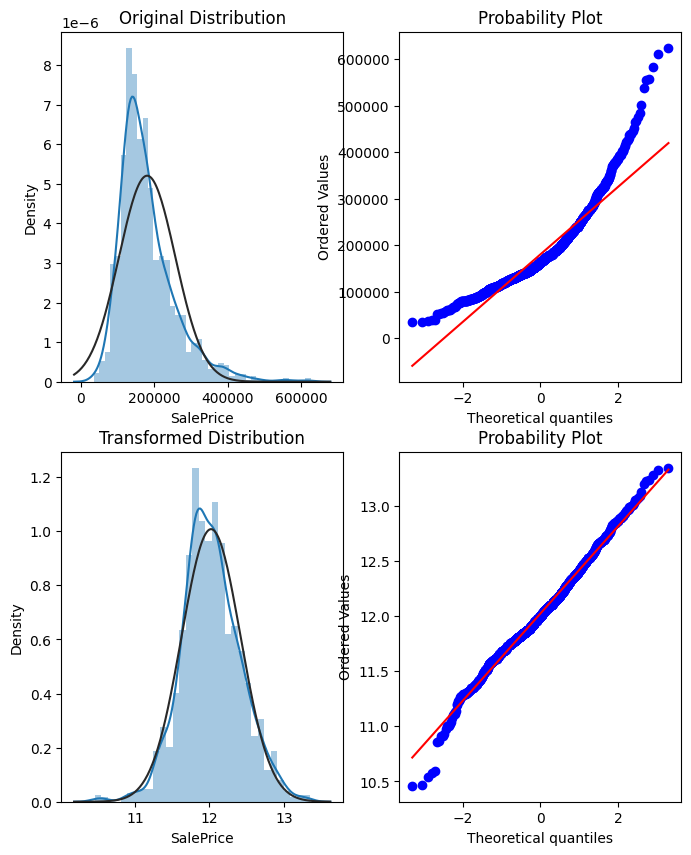

In [62]:
v = 'SalePrice'

fig, axes = plt.subplots(2, 2, figsize=(8,10))

sns.distplot(df_train[v], fit=norm, ax = axes[0,0])
axes[0, 0].set_title('Original Distribution')
stats.probplot(df_train[v], plot = axes[0,1])

y_new = np.log(df_train[v])
sns.distplot(y_new, fit=norm, ax = axes[1,0])
axes[1, 0].set_title('Transformed Distribution')
stats.probplot(y_new, plot=axes[1,1])
plt.show()

/var/folders/cv/8lbpg55x7gq0m33fw39zw0t40000gn/T/ipykernel_5868/1585304464.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




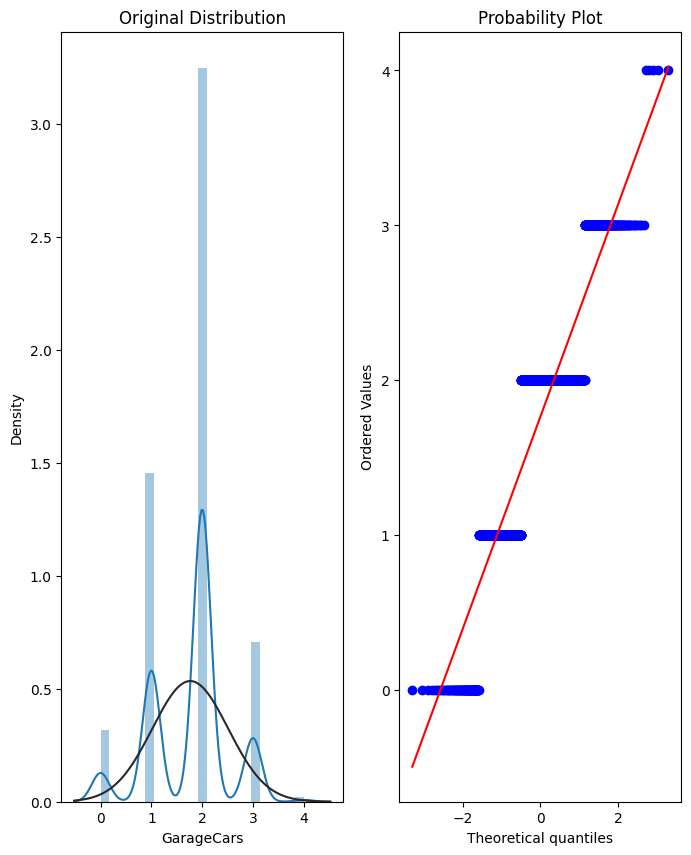

In [63]:
v = 'GarageCars'

fig, axes = plt.subplots(1,2, figsize=(8,10))

sns.distplot(df_train[v], fit=norm, ax = axes[0])
axes[0].set_title('Original Distribution')
stats.probplot(df_train[v], plot = axes[1])
plt.show()

/var/folders/cv/8lbpg55x7gq0m33fw39zw0t40000gn/T/ipykernel_5868/954828154.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




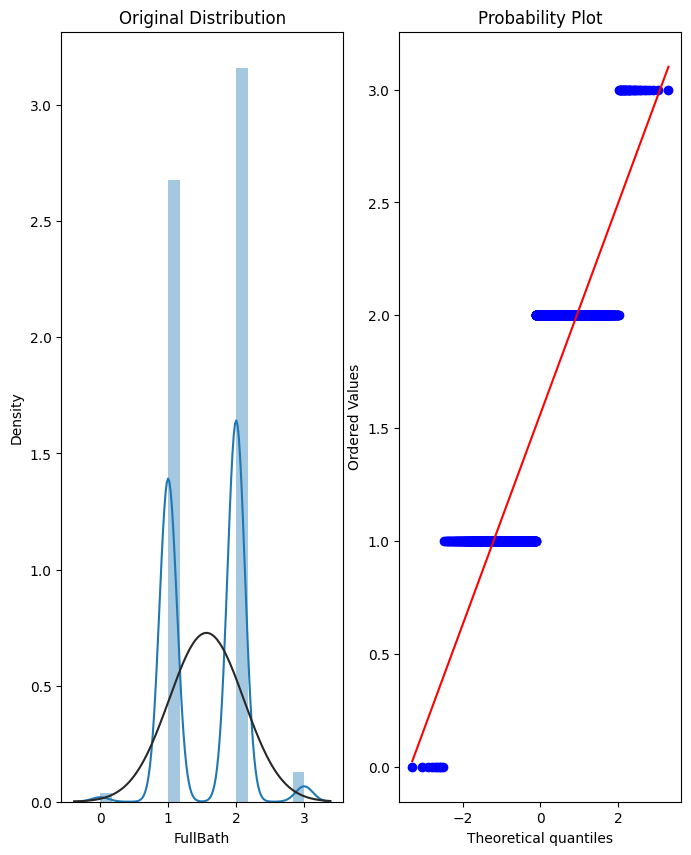

In [64]:
v = 'FullBath'

fig, axes = plt.subplots(1,2, figsize=(8,10))

sns.distplot(df_train[v], fit=norm, ax = axes[0])
axes[0].set_title('Original Distribution')
stats.probplot(df_train[v], plot = axes[1])
plt.show()

/var/folders/cv/8lbpg55x7gq0m33fw39zw0t40000gn/T/ipykernel_5868/799508413.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




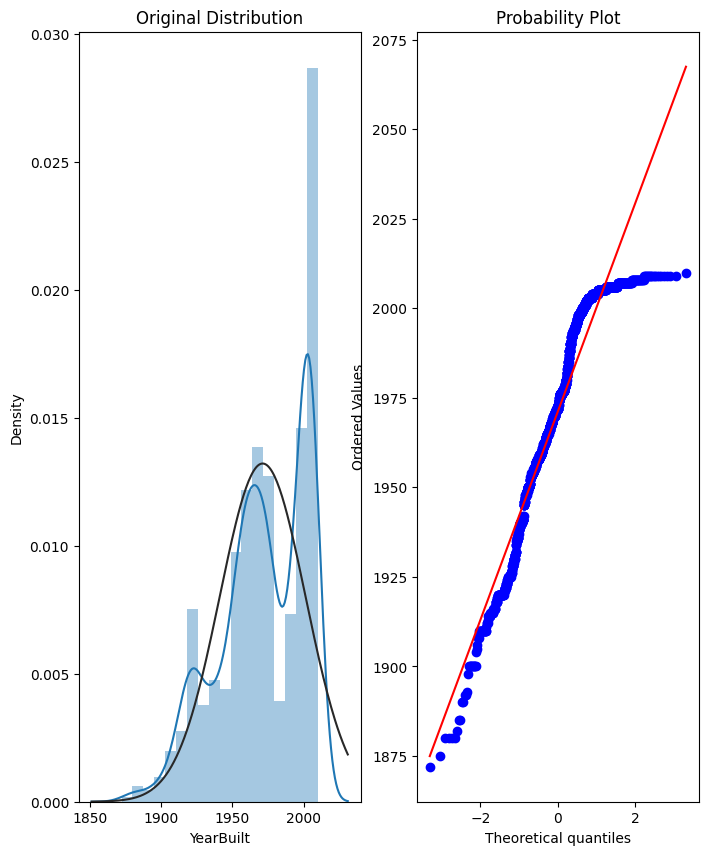

In [65]:
v = 'YearBuilt'

fig, axes = plt.subplots(1,2, figsize=(8,10))

sns.distplot(df_train[v], fit=norm, ax = axes[0])
axes[0].set_title('Original Distribution')
stats.probplot(df_train[v], plot = axes[1])
plt.show()

/var/folders/cv/8lbpg55x7gq0m33fw39zw0t40000gn/T/ipykernel_5868/2713773535.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/cv/8lbpg55x7gq0m33fw39zw0t40000gn/T/ipykernel_5868/2713773535.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




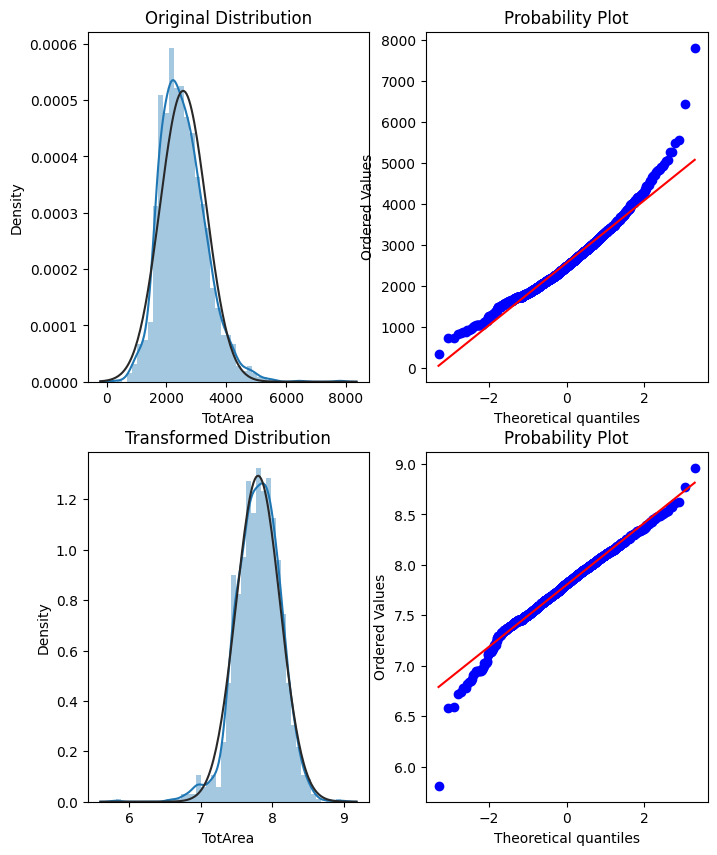

In [66]:
v = 'TotArea'

fig, axes = plt.subplots(2, 2, figsize=(8,10))

sns.distplot(df_train[v], fit=norm, ax = axes[0,0])
axes[0, 0].set_title('Original Distribution')
stats.probplot(df_train[v], plot = axes[0,1])

y_new = np.log(df_train[v])
sns.distplot(y_new, fit=norm, ax = axes[1,0])
axes[1, 0].set_title('Transformed Distribution')
stats.probplot(y_new, plot=axes[1,1])
plt.show()

In [67]:
df_train["log_TotArea"]=np.log(df_train['TotArea'])
df_train["log_price"]=np.log(df_train[target])
df_train.drop([target, 'TotArea'], axis=1, inplace=True)
target = 'log_price'

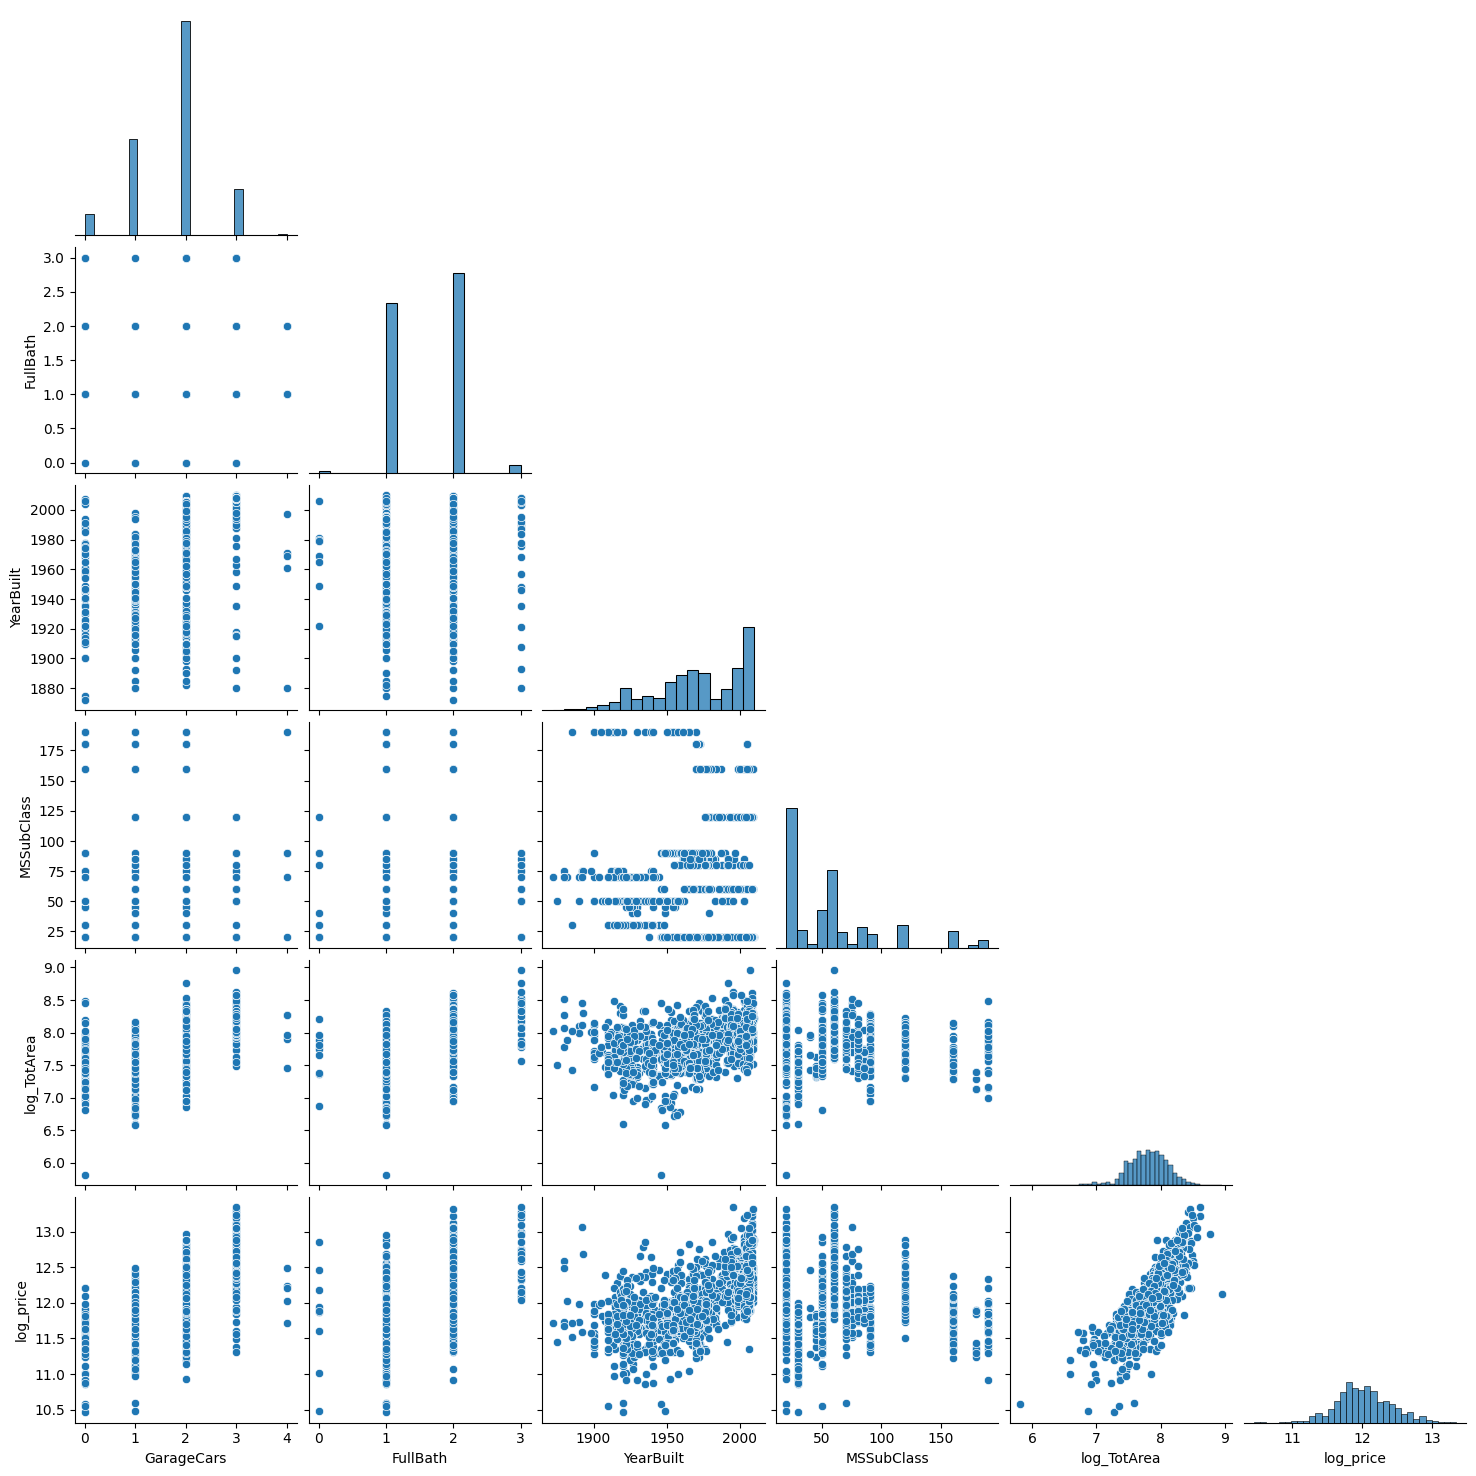

In [68]:
sns.pairplot(df_train, corner=True)

## VIII. One Hot encoding

In [69]:
df_train['MSSubClass'] = df_train['MSSubClass'].astype('str')
df_train = pd.get_dummies(df_train)

## Model

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor

In [71]:
cols = [c for c in df_train.columns if c!=target]
X = df_train[cols]
y = df_train[target]

LinearRegression
Mean Squared Error: 926834074.1168717 train: 812583090.4199673
30443.949712822607 train: 28505.843092600633


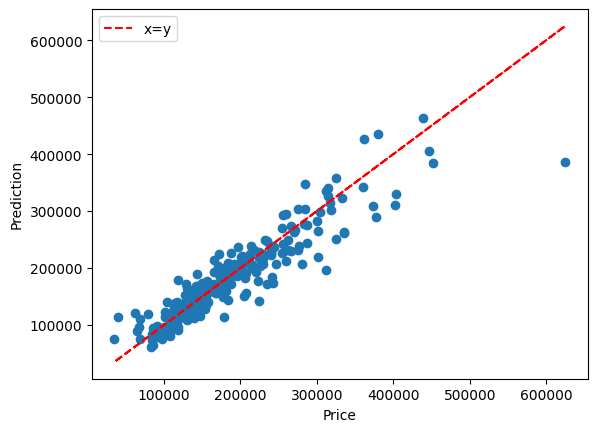

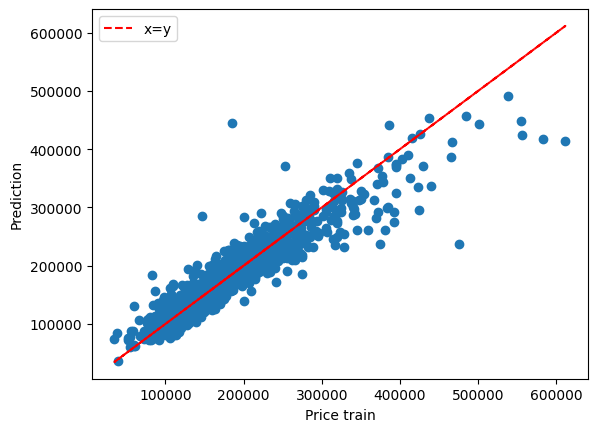

Ridge
Mean Squared Error: 920178427.5703087 train: 819981494.9174843
30334.44292500373 train: 28635.319011973384


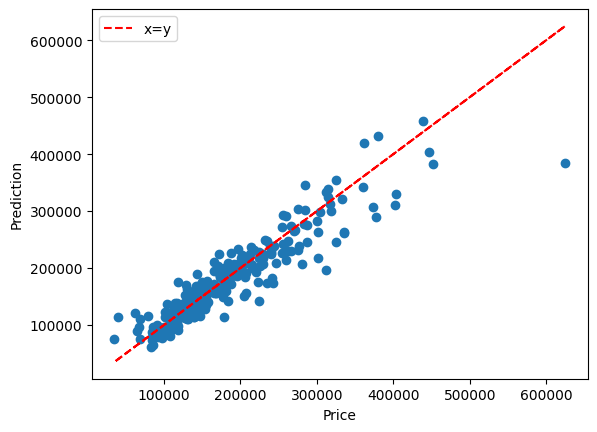

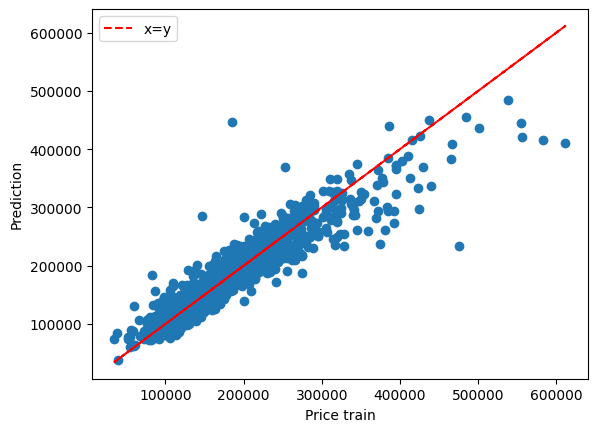

Lasso
Mean Squared Error: 4645221672.5152855 train: 4142143433.659632
68155.86308246184 train: 64359.485964849286


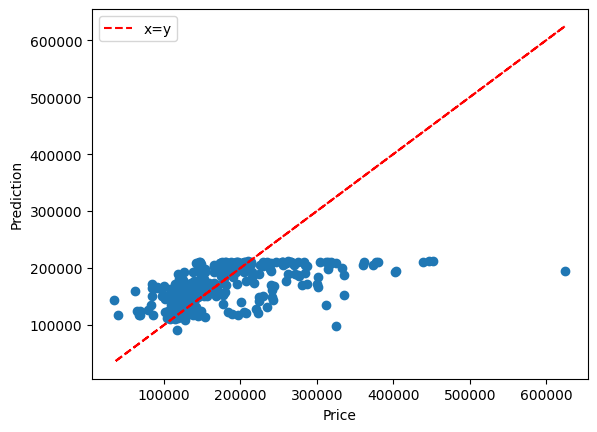

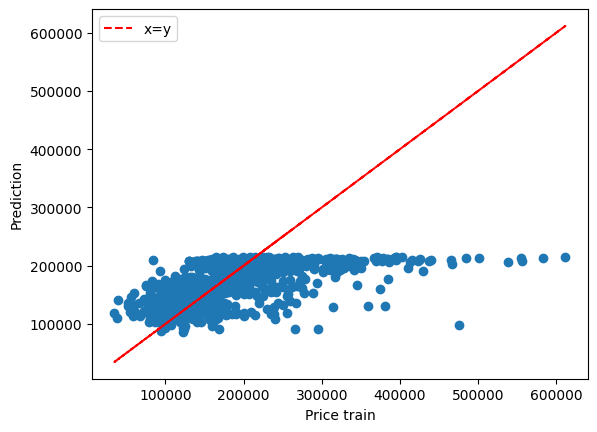

GBoosting
Mean Squared Error: 1043212232.1032776 train: 318425609.88479346
32298.796140154784 train: 17844.48401845213


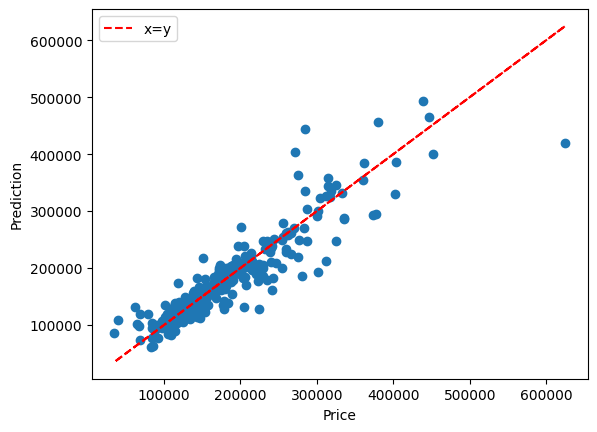

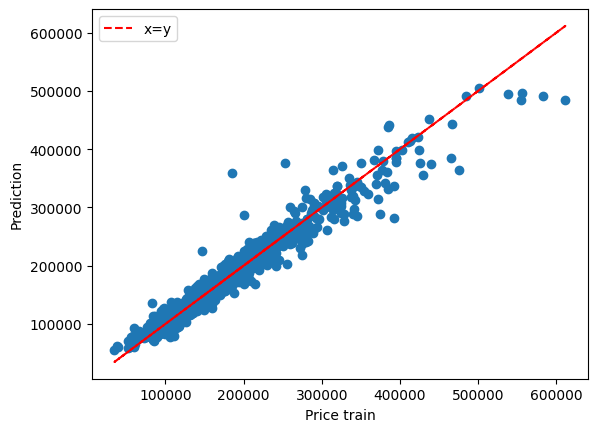

In [76]:


modelList = [('LinearRegression',LinearRegression()), 
         ('Ridge',Ridge()),
        ('Lasso',Lasso()),
        ('GBoosting',HistGradientBoostingRegressor())]

for name, model in modelList:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    y_test, y_pred = np.exp(y_test),np.exp(y_pred)
    y_train, y_pred_train = np.exp(y_train),np.exp(y_pred_train)
    # Evaluate the model
    print(name)
    mse = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    print(f'Mean Squared Error: {mse}', f'train: {mse_train}')
    print(np.sqrt(mse), f'train: {np.sqrt(mse_train)}')

    # Plot the linear regression line
    plt.scatter(y_test, y_pred)
    plt.plot(y_test,y_test, color='red', linestyle='--', label='x=y')
    plt.xlabel('Price')
    plt.ylabel('Prediction')
    plt.legend()
    plt.show()



    plt.scatter(y_train, y_pred_train)
    plt.plot(y_train,y_train, color='red', linestyle='--', label='x=y')
    plt.xlabel('Price train')
    plt.ylabel('Prediction')
    plt.legend()
    plt.show()